In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [4]:
# Charger le fichier CSV
filname = r'C:\Users\LENOVO\OneDrive\Bureau\Smart Ict ine2\projet dev\fer2013\fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names = ['emotion', 'pixels', 'usage']
df = pd.read_csv(filname, names=names, na_filter=False)
im = df['pixels']
print(df.head(10))

   emotion                                             pixels     usage
0  emotion                                             pixels     Usage
1        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
2        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
3        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
4        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
5        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
6        2  55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...  Training
7        4  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...  Training
8        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...  Training
9        3  85 84 90 121 101 102 133 153 153 169 177 189 1...  Training


In [5]:
# Fonction pour charger les données
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

X, Y = getData(filname)
num_class = len(np.unique(Y))

In [6]:
# Reshape des données pour être compatible avec le modèle
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)


In [7]:
# Fonction pour créer le modèle
def my_model():
    model = Sequential()
    input_shape = (48, 48, 1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape, activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model


In [10]:
# Création du modèle
model = my_model()

# Entraînement du modèle
path_model = 'model_filter.h5'
model.fit(x=X_train,
          y=y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test),
          shuffle=True,
          callbacks=[ModelCheckpoint(filepath=path_model)]
          )

Epoch 1/10
505/505 [==============================] - 2965s 6s/step - loss: 1.6541 - accuracy: 0.3591 - val_loss: 1.4978 - val_accuracy: 0.4163
Epoch 2/10
505/505 [==============================] - 2921s 6s/step - loss: 1.2975 - accuracy: 0.5042 - val_loss: 1.5170 - val_accuracy: 0.4308
Epoch 3/10
505/505 [==============================] - 2917s 6s/step - loss: 1.1254 - accuracy: 0.5772 - val_loss: 1.2050 - val_accuracy: 0.5378
Epoch 4/10
505/505 [==============================] - 1995s 4s/step - loss: 0.9945 - accuracy: 0.6288 - val_loss: 1.1111 - val_accuracy: 0.5832
Epoch 5/10
505/505 [==============================] - 2243s 4s/step - loss: 0.8745 - accuracy: 0.6772 - val_loss: 1.2186 - val_accuracy: 0.5729
Epoch 6/10
505/505 [==============================] - 3379s 7s/step - loss: 0.7337 - accuracy: 0.7321 - val_loss: 1.1069 - val_accuracy: 0.6066
Epoch 7/10
505/505 [==============================] - 2844s 6s/step - loss: 0.5699 - accuracy: 0.7922 - val_loss: 1.2098 - val_accuracy:

In [26]:
# Analyse des émotions prédites sur l'ensemble de test
objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
y_pos = np.arange(len(objects))
y_pred = model.predict(X_test)

113/113 [==============================] - 93s 823ms/step


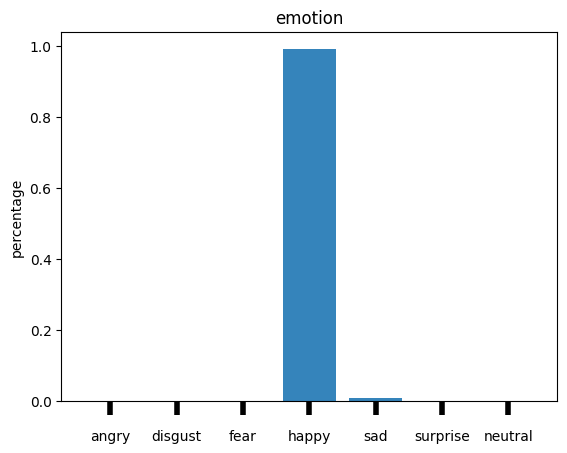

In [53]:
# Fonction pour afficher le pourcentage des émotions prédites
def emotion_analysis(emotions):
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10, width=4, length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

# Affichage des résultats
emotion_analysis(y_pred[0])


1/1 [==============================] - 0s 78ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


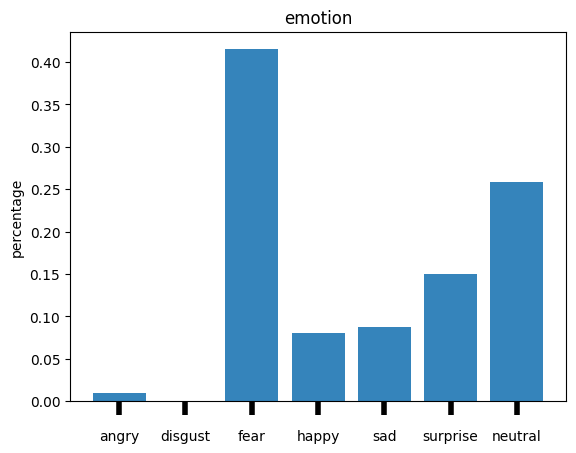

In [69]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Affichage de l'image
img = image.load_img(r'C:\Users\LENOVO\OneDrive\Bureau\Smart Ict ine2\projet dev\sad.jpeg', grayscale=True, target_size=(48, 48))
show_img = image.load_img(r'C:\Users\LENOVO\OneDrive\Bureau\Smart Ict ine2\projet dev\sad.jpeg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255

# Prédiction sur l'image
custom = model.predict(x)
emotion_analysis(custom[0])


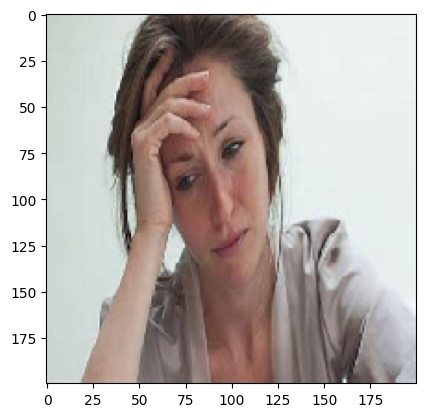

In [70]:
# Affichage de l'image
x = np.array(x, 'float32')
x = x.reshape([48, 48])
plt.gray()
plt.imshow(show_img)
plt.show()

In [66]:
# Analyse de l'émotion prédite
m = 0.000000000000000000001
a = custom[0]
for i in range(0, len(a)):
    if a[i] > m:
        m = a[i]
        ind = i

print('Expression Prediction:', objects[ind])

Expression Prediction: sad
